## Feature _ Selection _ EndtoEnd

In [ ]:
s=52712345

                       April 13, 2024

- Feature Engineering

   - Missing value analysis
    
   - Outlier analysis

   - Categorical to Numerical
    
   - Correlation

   - Data scaling

- Feature Selection
   
- we should not provide all the columns for model development

- some columns are very important, some columns are not at all important

- we need to select the important features so that our model performance will increase

**Retrival the important features,selecting an important features is very important step before going to ML**

   - Droping the constant features(Regression and Classification)
    
   - Information gain(Classification)

   - p-value(Regression)
    
   - VIF(Regression)

   - Forward selection and Backward selection (Regression and Classification)
    
   - Correlation with target column(Regression and Classification)

**Feature Selection Methods**
 
    1) Variance threshold:
        
        - based on variable we can decide the data is constant or varying
        
        - Data is not varying much means,data has unique values
        
        - For example we have seen in loan dataset,loan term:360
            
        - python by default will use variance=0, it will drop those features              which are having variance=0
        
        - Variance threshold is hyper parameter,we can keep threshold as any               value
        
        - based on internal team discussion
        
        - we will drop those feature which are having<= threshold value
        
    2) P-value
       
        - H0: there is no relation x and y
            
        - H1: there is relation x and y
            
        - p<0.05
        
          - Reject the Null hypothesis: ** Which means include the Variable**
                
        - p>0.05
        
          - Not reject the Null hypothesis: **Which means do not include the               variables**
                
    3) Mutual info classify:
        
        - KNN and entropy
        
        - It will give the relation between input and output will pick which are having more relation
        
        - Input vs Output
        
            - 1) Entropy
            
            - 2) KNN
            
            - 3) R-square: explainability about y based on x
                
    4) Forward selection and Backward selection 
    
    stats1/chapter/modelselection/#:~:text=The%20forward%20selection%20strategy%20is,measured%20by%20adjusted%20R2).
    
    **Forward Selection Method**
    
      - Start with empty set of features
        
      - Iterate through each features and select the one feature that improves          model performance
    
      - Continue adding features one by one till we meet our creteria
        
    **Backward Selection Method**
    
      - Start with full set of features
        
      - Iterate through each feature by removing the feature which is having            less impact on the model
    
     - Continue the process, till your performnace is stable
        
    - Both Forward selection and Backward selection methods are complex in             nature
    
          - More time taken,will avoid in general
    
   5) Variance inflation factor(VIF):
     
        - VIF will give the analysis of multicollinearity
        
        - In VIF will find the R-square value of each input feature wrt to other input feature
        
        - Will keep one features as output and other features are consider as input in Regression equation
        
        - This will keep on iterate through all feature
        
        - Every feature behave as input as well as output
        
        - As we know every regression line give Rsquare value from that value will fine VIF
        
        - will drop the feature which are having VIF>5 or VIF>10 based on iternal team discussion

Method -1 :  Variance threshold method

**Droping constant features**
  - if the features or variables having zero variance
    
  - the feature values through out the data is the same
 
  - you can decide manually what is your desired variance in order to keep the feature  

In [4]:
import pandas as pd
dict1={"A":[100,200,300,400],
      "B":[1,2,3,4],
      "C":[10,20,30,40],
      "D":[10,10,10,10]
      }
df=pd.DataFrame(dict1)
df

,A,B,C,D
0,100,1,10,10
1,200,2,20,10
2,300,3,30,10
3,400,4,40,10


In [5]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
# Threshold variance value
# we want to drop the feature based on threshold
vt.fit(df)

VarianceThreshold(threshold=0)

In [6]:
dir(vt)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_transform',
 '_validate_data',
 '_validate_params',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_metadata_routing',
 'get_params',
 'get_support',
 'inve

In [7]:
vt.variances_
# 300 is first column variance(T)
# 1.25 is second column varinace(T)
# 30 is column variances (T)
# 0 is fourth column variance(F)

array([300.  ,   1.25,  30.  ,   0.  ])

In [8]:
vt.get_support()

array([ True,  True,  True, False])

In [9]:
vt.get_params()
# hyper parameter
# that we providing imside the function

{'threshold': 0}

In [10]:
vt.threshold

0

In [11]:
cols=vt.get_feature_names_out()
# the above syntax gives the column names
# These feature only we want include
df[cols]

,A,B,C
0,100,1,10
1,200,2,20
2,300,3,30
3,400,4,40


In [12]:
## Apply on wine dataset
## Read the data
## Keep the threshold : 0,0.1
## Get the new data

In [13]:
import pandas as pd
path=r'C:\Users\91851\OneDrive\data science\Data Files\winequality_red.csv'
df=pd.read_csv(path)

from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
## make sure before fitting the dataframe , do not include output column

x=df.drop('quality',axis=1)
# x is self a data frame
vt.fit(x)
vt.variances_
vt.get_support()
cols=vt.get_feature_names_out()
x[cols]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


$Method-2$

**Information gain**

mutual info classify

- It is value estimating how much relationship/how much information about target variable

- 0 mean both variables are independent

- Here will use entropy or KNN method

In [14]:
import pandas as pd

# Read the data 
path=pd.read_csv(r'C:\Users\91851\OneDrive\data science\Data Files\winequality_red.csv')

x=path.drop('quality',axis=1)
y=path['quality']

In [15]:
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(x,y)
MI

array([0.05900509, 0.10598961, 0.06307697, 0.00248588, 0.02821486,
       0.02147172, 0.09477148, 0.0873005 , 0.01844475, 0.10786872,
       0.182843  ])

In [16]:
d=pd.DataFrame(MI,
              columns=['Information gain'],
              index=x.columns)
d.sort_values('Information gain',ascending=False)

# we need to select manualy
# how about python will provide top 5 or top 10 or top k
# SelectKBest

,Information gain
alcohol,0.182843
sulphates,0.107869
volatile acidity,0.105990
total sulfur dioxide,0.094771
density,0.087300
citric acid,0.063077
fixed acidity,0.059005
chlorides,0.028215
free sulfur dioxide,0.021472
pH,0.018445


In [17]:
# Two methods almost enough
# constant features ==== you need to remove
# mutual information
val=pd.Series(MI)   # index with series 
val.index=x.columns  # column with series
val

fixed acidity           0.059005
volatile acidity        0.105990
citric acid             0.063077
residual sugar          0.002486
chlorides               0.028215
free sulfur dioxide     0.021472
total sulfur dioxide    0.094771
density                 0.087300
pH                      0.018445
sulphates               0.107869
alcohol                 0.182843
dtype: float64

In [18]:
val.sort_values(ascending=True)

residual sugar          0.002486
pH                      0.018445
free sulfur dioxide     0.021472
chlorides               0.028215
fixed acidity           0.059005
citric acid             0.063077
density                 0.087300
total sulfur dioxide    0.094771
volatile acidity        0.105990
sulphates               0.107869
alcohol                 0.182843
dtype: float64

<Axes: >

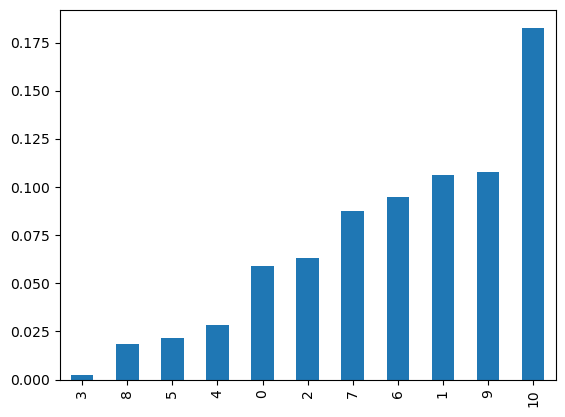

In [19]:
val=pd.Series(MI)
val.sort_values(ascending=True).plot(kind='bar')

is which suitable for both classification and regression sir mutual info  

at which step will do these feature selection

why we are splitting: x and y

python code will allow x and y sepeartely

thats why we are splitting

onces we extract the important features,those fesatures used to develop a model

$Select Kbest$

In [20]:
path=pd.read_csv(r'C:\Users\91851\OneDrive\data science\Data Files\winequality_red.csv')

path.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
import pandas as pd

#Read the data
path=pd.read_csv(r'C:\Users\91851\OneDrive\data science\Data Files\winequality_red.csv')

# Seperate input and target features
x=path.drop('quality',axis=1)
y=path['quality']

# Assume that you did not done mutual info classif
top_5=SelectKBest(mutual_info_classif,k=5)
val=top_5.fit(x,y)

In [22]:
val.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [23]:
val.get_feature_names_out()

array(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'], dtype=object)

In [24]:
val.get_params()

{'k': 5,
 'score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [25]:
val.scores_

array([0.05605426, 0.12111045, 0.05076091, 0.01126236, 0.0333379 ,
       0.01599474, 0.0808317 , 0.0879355 , 0.03136667, 0.09659977,
       0.17463572])

**Method-3**

**P-value**

we can develop Linear regression model using two packages
  - Sklearn
      - Have linear model
      - It gives intercept,coeff,MSE,Rsquare etc
      - But it did not give the p-value
  - stats
      - Have OLS method
      - It gives intercept,coeff,Rsquare also p-value table
      - We can select important features using p-value

In [26]:
########### ALL Together #####################
# step-1: Import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# step-2: Read the data
path=r'C:\Users\91851\OneDrive\data science\Data Files\winequality_red.csv'
df=pd.read_csv(path)

# step-3(optional): if you are seeing any duplicates 
#            or data has empty rows when you resad it display as Null or NaN
#            if you are seeing this check it is really a missing values
#            or data has empty rows (alternative rows)
df.dropna (inplace=True)
df.reset_index(inplace=True)

##################### EDA ###############################
# Numerical data should be ready before go to the step-4
########################################################

# step-4: Divide into x and y
df.drop('quality',axis=1)
y=df['quality']

# Step:5: Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,
                                                 y,
                                                 random_state=1234,
                                                 test_size=0.30)

from statsmodels.api import OLS
OLS(y_train,x_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              7512.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:51:00   Log-Likelihood:                         -1115.2
No. Observations:                1119   AIC:                                      2252.
Df Residuals:                    1108   BIC:                                      2308.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0133      0.020      0.664      0.507      -0.026       0.053
volatile acidity        -1.1899      0.142     -8.354      0.000      -1.469      -0.910
citric acid             -0.2557      0.178     -1.434      0.152      -0.606       0.094
residual sugar          -0.0025      0.014     -0.178      0.859      -0.031       0.025
chlorides               -1.5735      0.494     -3.182      0.002      -2.544      -0.603
free sulfur dioxide      0.0067      0.003      2.530      0.012       0.001       0.012
total sulfur dioxide    -0.0040      0.001     -4.260      0.000      -0.006      -0.002
density                  4.3073      0.768      5.606      0.000       2.800       5.815
pH                      -0.5074      0.196     -2.587      0.010      -0.892      -0.123
sulphates                0.9424      0.133      7.109      0.000       0.682       1.203
alcohol                  0.3085      0.022     14.229      0.000       0.266       0.351
==============================================================================
Omnibus:                       13.594   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.983
Skew:                          -0.165   Prob(JB):                     0.000205
Kurtosis:                       3.506   Cond. No.                     2.41e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Method-4**

$VIF$

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sample data
data={
    'x1':np.random.randn(100),
    'x2':np.random.randn(100),
    'x3':np.random.randn(100)
}

df=pd.DataFrame(data)

# Adding a multicollinear variable
df['x4']=2*df['x1'] + 3*df['x2'] + np.random.normal(0,0.1,100)

# Fit a multiple regression model
x = df[['x1', 'x2', 'x3', 'x4']]
y = np.random.randn(100)
model=sm.OLS(y, sm.add_constant(x)).fit()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['festure']=x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

  festure          VIF
0      x1   714.651098
1      x2  1314.845480
2      x3     1.055455
3      x4  2122.385491


In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7919
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.533
Time:                        17:03:42   Log-Likelihood:                -125.55
No. Observations:                 100   AIC:                             261.1
Df Residuals:                      95   BIC:                             274.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.092     -0.051      0.960      -0.187       0.178
x1            -0.4608      2.158     -0.213      0.831      -4.746       3.824
x2            -0.9205      3.244     -0.284      0.777      -7.361       5.520
x3             0.0124      0.082      0.150      0.881      -0.151       0.176
x4             0.3046      1.082      0.282      0.779      -1.843       2.452
==============================================================================
Omnibus:                        4.763   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                2.577
Skew:                          -0.132   Prob(JB):                        0.276
Kurtosis:                       2.259   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# step-2: Read the data
path=r'C:\Users\91851\OneDrive\data science\Data Files\winequality_red.csv'
df=pd.read_csv(path)


#Step-3(optional): If you are seeing any duplicates
#         or data has empty rows when you read it display as Null or Nan
#         if you are seeing this check it is really a missing values
#         or data has empty rows (alternative rows)
df.dropna(inplace=True)
df.reset_index(inplace=True)

################### EDA ###################################
# Numerical data should be ready before go to the step-4
##########################################################

#Step-4: Divide into x and y
x=df.drop('quality',axis=1)
y=df['quality']

In [30]:
x.values,2

(array([[0.000e+00, 7.400e+00, 7.000e-01, ..., 3.510e+00, 5.600e-01,
         9.400e+00],
        [1.000e+00, 7.800e+00, 8.800e-01, ..., 3.200e+00, 6.800e-01,
         9.800e+00],
        [2.000e+00, 7.800e+00, 7.600e-01, ..., 3.260e+00, 6.500e-01,
         9.800e+00],
        ...,
        [1.596e+03, 6.300e+00, 5.100e-01, ..., 3.420e+00, 7.500e-01,
         1.100e+01],
        [1.597e+03, 5.900e+00, 6.450e-01, ..., 3.570e+00, 7.100e-01,
         1.020e+01],
        [1.598e+03, 6.000e+00, 3.100e-01, ..., 3.390e+00, 6.600e-01,
         1.100e+01]]),
 2)

In [ ]:
variance_inflation_factor(x.values,0)
# x.values ====== all the columns data
# VIF one column o/p = input
VIF(data,which column)

In [32]:
# Calculate VIF
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

                 feature          VIF
0                  index     5.054246
1          fixed acidity    80.338968
2       volatile acidity    17.065205
3            citric acid     9.197695
4         residual sugar     4.663513
5              chlorides     6.573395
6    free sulfur dioxide     6.781651
7   total sulfur dioxide     6.916574
8                density  1551.937829
9                     pH  1109.622836
10             sulphates    21.844623
11               alcohol   130.707581
